In [1]:
from sdeconv.deconv import PSFGibsonLanni
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


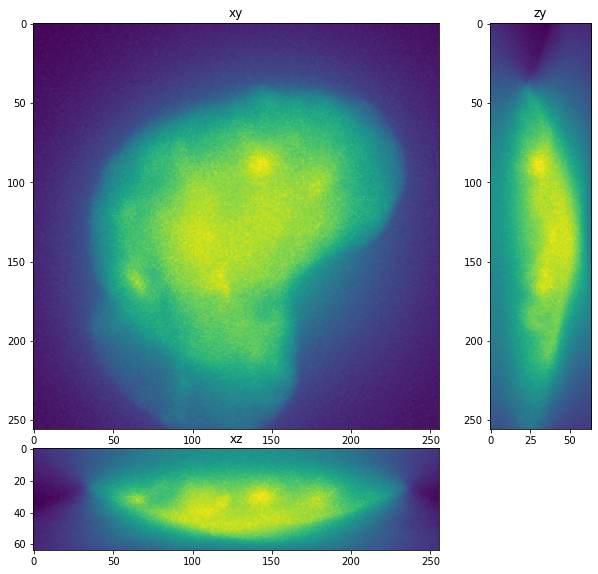

In [2]:
from skimage.io import imread

base_dir ='/home/bnorthan/Images/tnia-python-images/notebooks/'
base_dir =r'D:\images\tnia-python-images\notebooks//'

dir_name=base_dir+'deconvolution/McNamara/'

input_name=dir_name+"GM 20131101Fri_StellarisFISH_1_w61 = DAPI ROI.tif" 

im = imread(input_name)

fig = show_xyz_max(im)

In [3]:
gl = PSFGibsonLanni((64,128,128),62.9,200,1.4,500,150,1.5,1.3)
psf = gl.run()
psf = psf/psf.sum()

In [4]:
import RedLionfishDeconv as rl
decon=rl.doRLDeconvolutionFromNpArrays(im, psf, niter=200, method='gpu', resAsUint8=False )

In [7]:
decon_clijnc=richardson_lucy_nc(im, psf, 200, 0.0001)

get lib


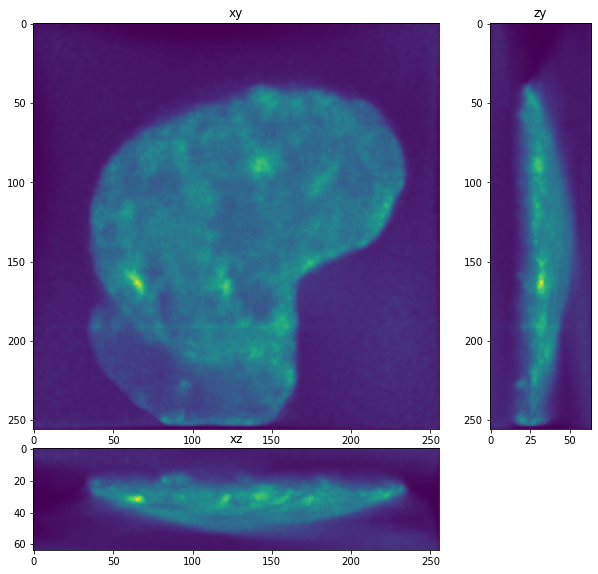

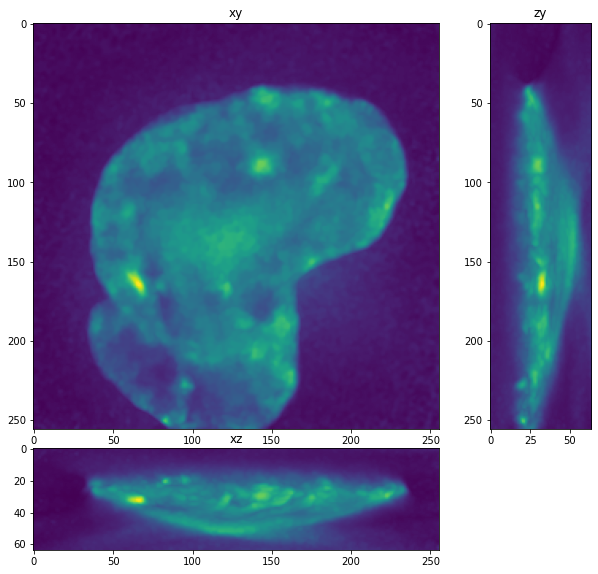

In [8]:
fig = show_xyz_max(decon)
fig = show_xyz_max(decon_clijnc)

In [ ]:
viewer=napari.Viewer()
viewer.add_image(1)